In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('oldreasons.csv')

In [6]:
df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [7]:
num_rows = df.shape[0]
print(f'Number of rows: {num_rows}')

Number of rows: 66653


In [8]:
# Get the count of each unique reason in the 'primary_call_reason' column
reason_counts = df['primary_call_reason'].value_counts()
print(reason_counts)


IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support            136
Mileage  P

In [9]:
# Standardize the 'primary_call_reason' by stripping extra spaces and converting to title case
df['primary_call_reason'] = df['primary_call_reason'].str.strip().str.title()

# Check the updated unique reasons and their counts
cleaned_reason_counts = df['primary_call_reason'].value_counts()
print(cleaned_reason_counts)


Irrops                   13311
Voluntary Change         10499
Seating                   6365
Mileage Plus              5587
Post-Flight               3957
Communications            3840
Products And Services     2856
Baggage                   2832
Upgrade                   2738
Booking                   2637
Checkout                  1888
Check-In                  1519
Voluntary Cancel          1329
Digital Support           1014
Etc                        952
Traveler Updates           782
Schedule Change            731
Other Topics               584
Products & Services        476
Disability                 403
Check In                   385
Post Flight                373
Voluntary  Cancel          278
Other  Topics              234
Voluntary   Change         200
Voluntary  Change          149
Digital   Support          136
Mileage  Plus              135
Mileage   Plus             129
Traveler   Updates         117
Unaccompanied Minor        104
Digital  Support            75
Traveler

In [10]:
# Strip extra spaces again to clean up remaining inconsistencies
df['primary_call_reason'] = df['primary_call_reason'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Unify the names of specific reasons that have variations
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Products & Services': 'Products And Services',
    'Post Flight': 'Post-Flight',
    'Check In': 'Check-In',
    'Other  Topics': 'Other Topics',
    'Voluntary  Cancel': 'Voluntary Cancel',
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Digital   Support': 'Digital Support',
    'Digital  Support': 'Digital Support',
    'Mileage  Plus': 'Mileage Plus',
    'Mileage   Plus': 'Mileage Plus',
    'Traveler  Updates': 'Traveler Updates',
    'Traveler   Updates': 'Traveler Updates'
})

# Verify the cleaned distribution
cleaned_reason_counts = df['primary_call_reason'].value_counts()
print(cleaned_reason_counts)


Irrops                   13311
Voluntary Change         10848
Seating                   6365
Mileage Plus              5851
Post-Flight               4330
Communications            3840
Products And Services     3332
Baggage                   2832
Upgrade                   2738
Booking                   2637
Check-In                  1904
Checkout                  1888
Voluntary Cancel          1607
Digital Support           1225
Etc                        952
Traveler Updates           937
Other Topics               818
Schedule Change            731
Disability                 403
Unaccompanied Minor        104
Name: primary_call_reason, dtype: int64


In [11]:
import random

# Assuming 'df' is your existing DataFrame
# Example of the current distribution
current_distribution = {
    'Irrops': 13311,
    'Voluntary Change': 10848,
    'Seating': 6365,
    'Mileage Plus': 5851,
    'Post-Flight': 4330,
    'Communications': 3840,
    'Products And Services': 3332,
    'Baggage': 2832,
    'Upgrade': 2738,
    'Booking': 2637,
    'Check-In': 1904,
    'Checkout': 1888,
    'Voluntary Cancel': 1607,
    'Digital Support': 1225,
    'Etc': 952,
    'Traveler Updates': 937,
    'Other Topics': 818,
    'Schedule Change': 731,
    'Disability': 403,
    'Unaccompanied Minor': 104
}

# Create a list of reasons weighted by their counts
reasons = []
for reason, count in current_distribution.items():
    reasons.extend([reason] * count)

# Randomly sample 5157 reasons from the weighted list
new_reasons = random.choices(reasons, k=5157)

# Generate random phone numbers in the format already present in the dataset
def generate_phone_number():
    return f"{random.randint(1000000000, 9999999999)}"  # 10-digit phone number

new_phone_numbers = [generate_phone_number() for _ in range(5157)]

# Create a new DataFrame with the new rows
new_data = pd.DataFrame({
    'call_id': new_phone_numbers,
    'primary_call_reason': new_reasons
})

# Append the new data to the existing DataFrame
df = pd.concat([df, new_data], ignore_index=True)

# Optional: Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the new DataFrame's shape
print(df.shape)


(71810, 2)


In [12]:
df.to_csv('newreasons.csv', index=False)

print("DataFrame has been exported to 'newreasons.csv'")

DataFrame has been exported to 'newreasons.csv'


In [13]:
data=pd.read_csv('newreasons.csv')

In [14]:
counts = data['primary_call_reason'].value_counts()
print(counts)


Irrops                   14317
Voluntary Change         11690
Seating                   6829
Mileage Plus              6295
Post-Flight               4678
Communications            4130
Products And Services     3606
Baggage                   3060
Upgrade                   2954
Booking                   2858
Check-In                  2044
Checkout                  2034
Voluntary Cancel          1745
Digital Support           1341
Etc                       1025
Traveler Updates          1010
Other Topics               868
Schedule Change            787
Disability                 424
Unaccompanied Minor        115
Name: primary_call_reason, dtype: int64


In [15]:
data_customers=pd.read_csv('oldcustomers.csv')

In [16]:
data_customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [17]:
unique_elite_levels = data_customers['elite_level_code'].unique()

# Display the unique values
print(unique_elite_levels)

[ 4. nan  2.  0.  5.  1.  3.]


In [18]:
elite_counts = data_customers['elite_level_code'].value_counts()

# Print the counts of each unique value
print(elite_counts)

0.0    14387
1.0    14370
2.0     8028
3.0     5736
4.0     2125
5.0     1397
Name: elite_level_code, dtype: int64


In [19]:
median_value = data_customers['elite_level_code'].median()

In [20]:
data_customers['elite_level_code'].fillna(median_value, inplace=True)

# Optional: Save the updated DataFrame back to a CSV file
data_customers.to_csv('newcustomers.csv',index=False)


In [21]:
data_call=pd.read_csv('oldcalls.csv')

In [22]:
data_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [23]:
data_call.drop(columns=['call_transcript'], inplace=True)

In [24]:
data_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23


In [25]:
# Convert call_start_datetime and call_end_datetime to datetime format
data_call['call_start_datetime'] = pd.to_datetime(data_call['call_start_datetime'])
data_call['call_end_datetime'] = pd.to_datetime(data_call['call_end_datetime'])
data_call['agent_assigned_datetime'] = pd.to_datetime(data_call['agent_assigned_datetime'])

# Calculate call duration
data_call['total_customer_duration'] = data_call['call_end_datetime'] - data_call['call_start_datetime']
data_call['customer_wait_time_queue'] = data_call['agent_assigned_datetime'] - data_call['call_start_datetime']


In [26]:
data_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_queue
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,0 days 00:38:00,0 days 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,0 days 00:15:00,0 days 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,0 days 00:27:00,0 days 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,0 days 00:12:00,0 days 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,0 days 00:19:00,0 days 00:10:00


In [27]:
# Export the DataFrame to a CSV file named 'newcalls.csv'
data_call.to_csv('newcalls.csv', index=False)

print("Data exported to newcalls.csv successfully.")

Data exported to newcalls.csv successfully.


In [28]:
df_sentiments=pd.read_csv('oldsentiments.csv')

In [29]:
df_sentiments.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [30]:
missing_values = df_sentiments.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [31]:
df_sentiments['agent_tone'].fillna(df_sentiments['agent_tone'].mode()[0], inplace=True)

# Fill missing values for average_sentiment with median
df_sentiments['average_sentiment'].fillna(df_sentiments['average_sentiment'].median(), inplace=True)

In [32]:
missing_values = df_sentiments.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [33]:
df_sentiments.to_csv('newsentiments.csv', index=False)

In [34]:
df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,Irrops
3,2266439882,Upgrade
4,1211603231,Seating


In [35]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 71810


In [36]:
data_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_queue
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,0 days 00:38:00,0 days 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,0 days 00:15:00,0 days 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,0 days 00:27:00,0 days 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,0 days 00:12:00,0 days 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,0 days 00:19:00,0 days 00:10:00


In [37]:
num_rows = data_call.shape[0]
print("Number of rows:", num_rows)

Number of rows: 71810


In [38]:
data_customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,1.0
2,2416856629,Jeffery Dixon,1.0
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [39]:
num_rows = data_customers.shape[0]
print("Number of rows:", num_rows)

Number of rows: 71810


In [40]:
df_sentiments.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [41]:
num_rows = df_sentiments.shape[0]
print("Number of rows:", num_rows)

Number of rows: 71810


In [42]:
# Merge datasets
merged_df = df.merge(data_call, on='call_id', how='inner') \
               .merge(data_customers, on='customer_id', how='inner') \
               .merge(df_sentiments, on='call_id', how='inner')

# Save to a new CSV file
merged_df.to_csv('united_merged.csv', index=False)

In [105]:
df=pd.read_csv('united_merged.csv')

In [106]:
df.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_in_queue,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,average_handle_time
0,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,00:15:00,00:03:00,Tammy Walters,1,519057,calm,neutral,0.02,0.35,00:12:00
1,6834291559,Irrops,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,00:27:00,00:08:00,Jeffery Dixon,1,158319,neutral,polite,-0.13,0.32,00:19:00
2,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,00:12:00,00:05:00,David Wilkins,2,488324,neutral,frustrated,-0.20,0.20,00:07:00
3,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,00:19:00,00:10:00,Elizabeth Daniels,0,721730,neutral,polite,-0.05,0.35,00:09:00
4,5297766997,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,00:29:00,00:05:00,Emily Alexander,5,817160,calm,calm,0.10,0.11,00:24:00


In [107]:
# Check the data types of the columns
print(df[['customer_wait_time_in_queue', 'average_handle_time']].dtypes)


customer_wait_time_in_queue    object
average_handle_time            object
dtype: object


In [108]:
# Convert time-like columns from strings to timedelta
df['customer_wait_time_in_queue'] = pd.to_timedelta(df['customer_wait_time_in_queue'])
df['average_handle_time'] = pd.to_timedelta(df['average_handle_time'])


# Peak Load Analysis: AST and AHT Trends by Hour
You can plot a line graph showing AST (Average Speed of Answer) and AHT (Average Handle Time) by hour to identify peak times.

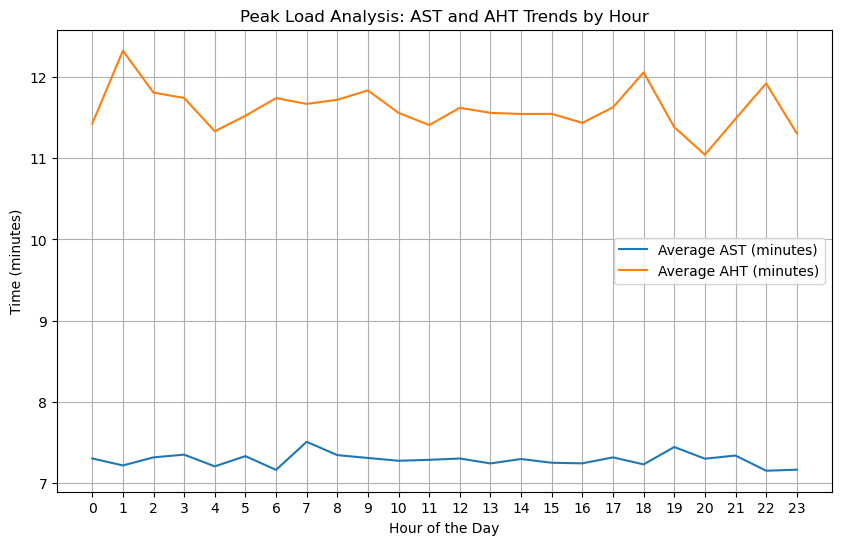

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert time-like columns from strings to timedelta
df['customer_wait_time_in_queue'] = pd.to_timedelta(df['customer_wait_time_in_queue'])
df['average_handle_time'] = pd.to_timedelta(df['average_handle_time'])

# Convert timedelta to total minutes
df['customer_wait_time_in_queue'] = df['customer_wait_time_in_queue'].dt.total_seconds() / 60
df['average_handle_time'] = df['average_handle_time'].dt.total_seconds() / 60

# Convert call_start_datetime to datetime and extract hour
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['hour'] = df['call_start_datetime'].dt.hour

# Calculate average AST and AHT by hour
hourly_avg = df.groupby('hour').agg({
    'customer_wait_time_in_queue': 'mean',
    'average_handle_time': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x='hour', y='customer_wait_time_in_queue', label='Average AST (minutes)')
sns.lineplot(data=hourly_avg, x='hour', y='average_handle_time', label='Average AHT (minutes)')
plt.title('Peak Load Analysis: AST and AHT Trends by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Time (minutes)')
plt.legend()
plt.xticks(hourly_avg['hour'])  # Ensure all hours are displayed
plt.grid(True)
plt.show()


# Sentiment and Performance: Correlation Between Customer Sentiment and AHT/AST
You can create scatter plots to check if customer sentiment correlates with longer handling times.

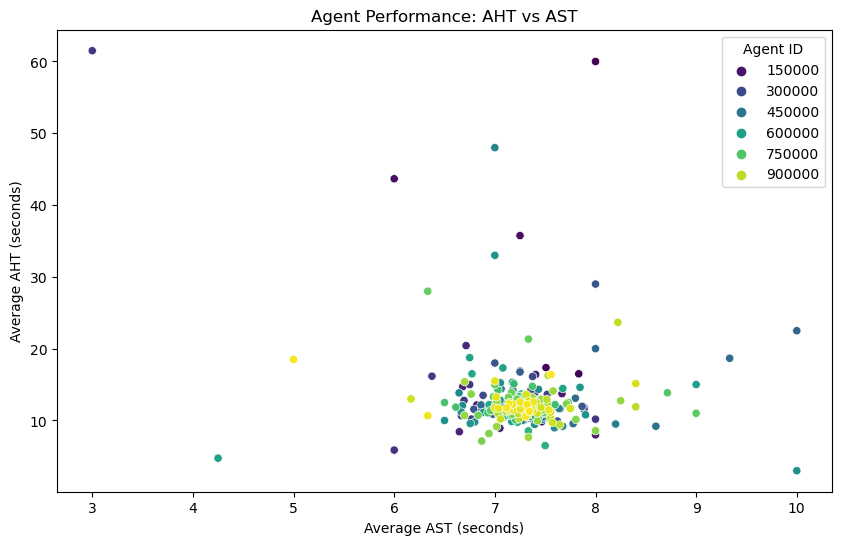

In [110]:
# Group by agent and calculate average AHT and AST
agent_performance = df.groupby('agent_id_x').agg({
    'customer_wait_time_in_queue': 'mean',
    'average_handle_time': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=agent_performance, x='customer_wait_time_in_queue', y='average_handle_time', hue='agent_id_x', palette='viridis')
plt.title('Agent Performance: AHT vs AST')
plt.xlabel('Average AST (seconds)')
plt.ylabel('Average AHT (seconds)')
plt.legend(title='Agent ID')
plt.show()


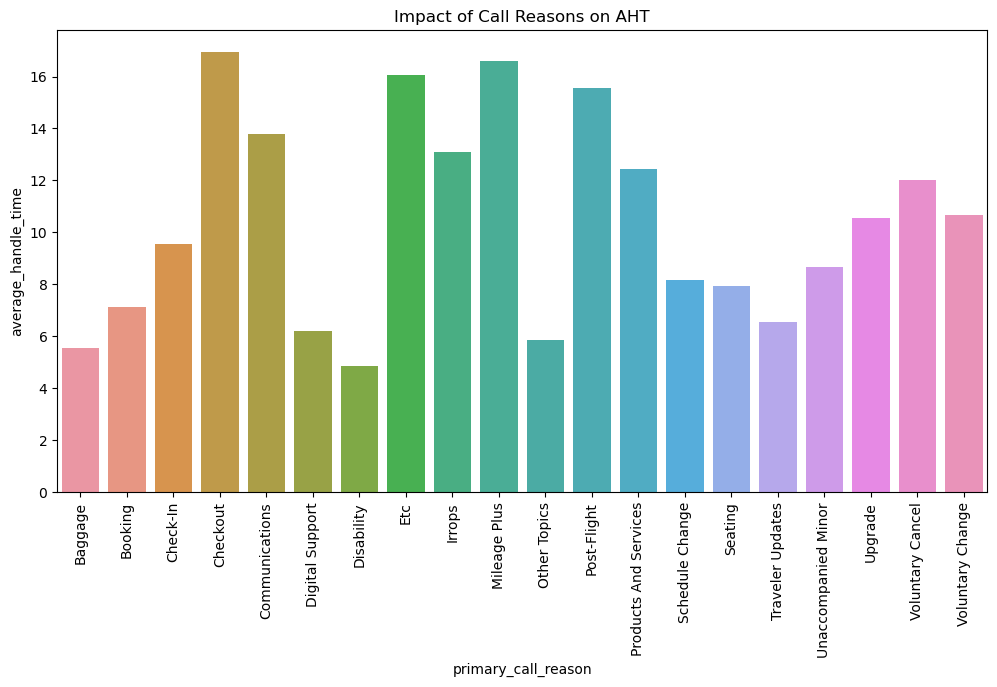

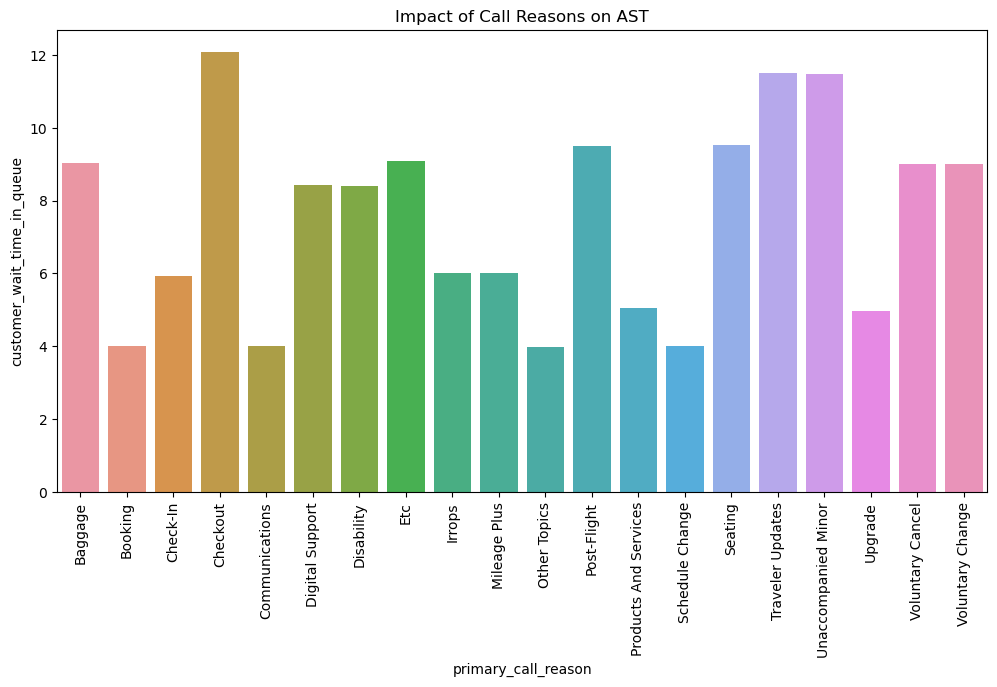

In [111]:
# Group by primary call reason
reason_performance = df.groupby('primary_call_reason').agg({
    'customer_wait_time_in_queue': 'mean',
    'average_handle_time': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=reason_performance, x='primary_call_reason', y='average_handle_time')
plt.title('Impact of Call Reasons on AHT')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=reason_performance, x='primary_call_reason', y='customer_wait_time_in_queue')
plt.title('Impact of Call Reasons on AST')
plt.xticks(rotation=90)
plt.show()


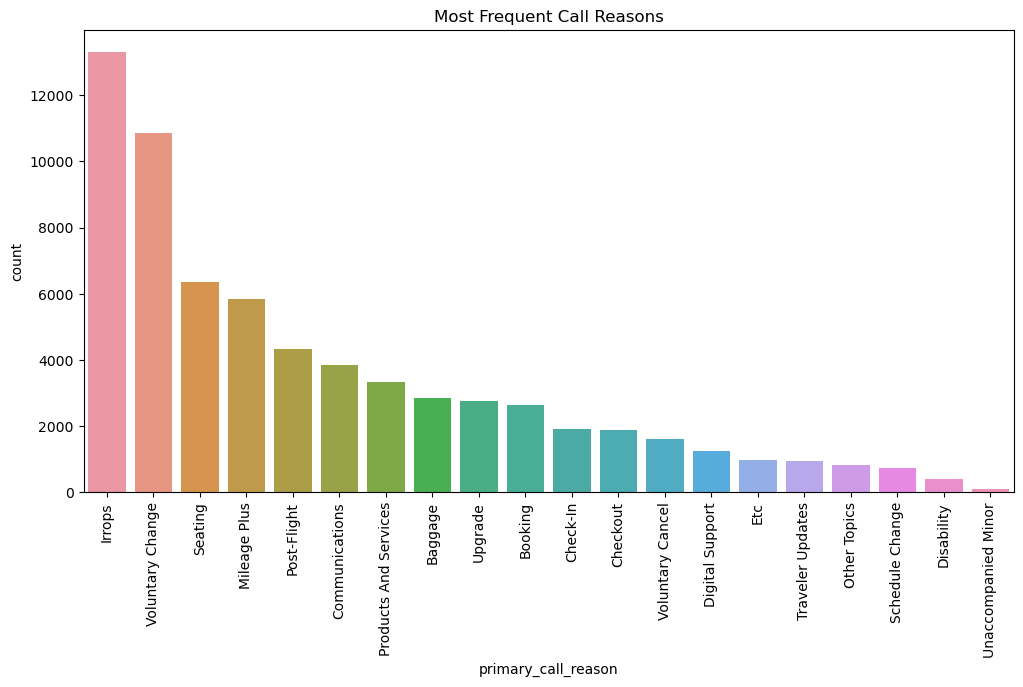

In [112]:
# Count the number of calls for each reason
call_reason_counts = df['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'count']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=call_reason_counts, x='primary_call_reason', y='count')
plt.title('Most Frequent Call Reasons')
plt.xticks(rotation=90)
plt.show()


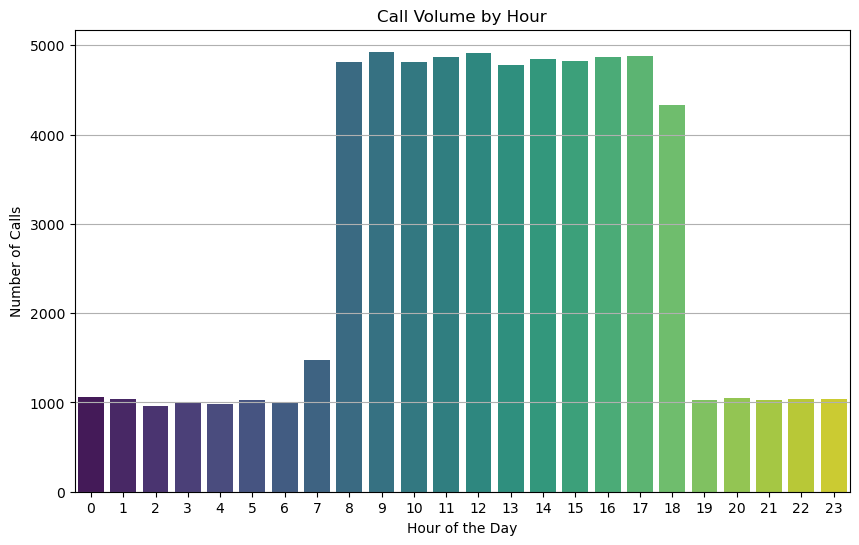

In [113]:
# Convert call_start_datetime to datetime if not already done
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])

# Extract the hour from the call_start_datetime
df['hour'] = df['call_start_datetime'].dt.hour

# Group by hour and count the number of calls
call_volume_by_hour = df.groupby('hour').size().reset_index(name='call_count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=call_volume_by_hour, x='hour', y='call_count', palette='viridis')
plt.title('Call Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

In [114]:
print(df.columns)


Index(['call_id', 'primary_call_reason', 'customer_id', 'agent_id_x',
       'call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime',
       'total_customer_duration', 'customer_wait_time_in_queue',
       'customer_name', 'elite_level_code', 'agent_id_y', 'agent_tone',
       'customer_tone', 'average_sentiment', 'silence_percent_average',
       'average_handle_time', 'hour'],
      dtype='object')


In [116]:
df.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_in_queue,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,average_handle_time,hour
0,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,00:15:00,3.0,Tammy Walters,1,519057,calm,neutral,0.02,0.35,12.0,0
1,6834291559,Irrops,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,00:27:00,8.0,Jeffery Dixon,1,158319,neutral,polite,-0.13,0.32,19.0,23
2,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,00:12:00,5.0,David Wilkins,2,488324,neutral,frustrated,-0.20,0.20,7.0,0
3,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,00:19:00,10.0,Elizabeth Daniels,0,721730,neutral,polite,-0.05,0.35,9.0,0
4,5297766997,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,00:29:00,5.0,Emily Alexander,5,817160,calm,calm,0.10,0.11,24.0,0


In [117]:
# Check the data type of each column in the DataFrame
print(df.dtypes)


call_id                                 int64
primary_call_reason                    object
customer_id                             int64
agent_id_x                              int64
call_start_datetime            datetime64[ns]
agent_assigned_datetime                object
call_end_datetime                      object
total_customer_duration                object
customer_wait_time_in_queue           float64
customer_name                          object
elite_level_code                        int64
agent_id_y                              int64
agent_tone                             object
customer_tone                          object
average_sentiment                     float64
silence_percent_average               float64
average_handle_time                   float64
hour                                    int64
dtype: object


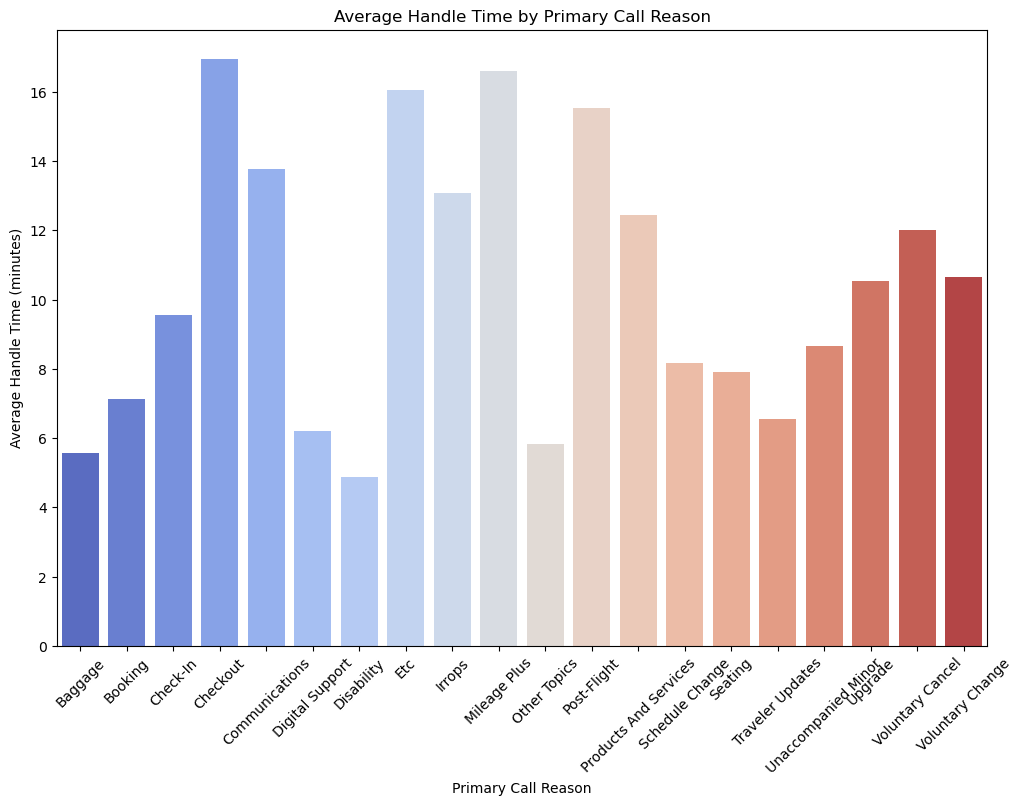

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame that you provided earlier

# Step 1: Convert primary_call_reason to a category (if not already)
df['primary_call_reason'] = df['primary_call_reason'].astype('category')

# Step 2: Group by primary_call_reason and calculate the mean average_handle_time
mean_handle_time = df.groupby('primary_call_reason')['average_handle_time'].mean().reset_index()

# Step 3: Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='primary_call_reason', y='average_handle_time', data=mean_handle_time, palette='coolwarm')
plt.title('Average Handle Time by Primary Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xlabel('Primary Call Reason')
plt.xticks(rotation=45)
plt.show()


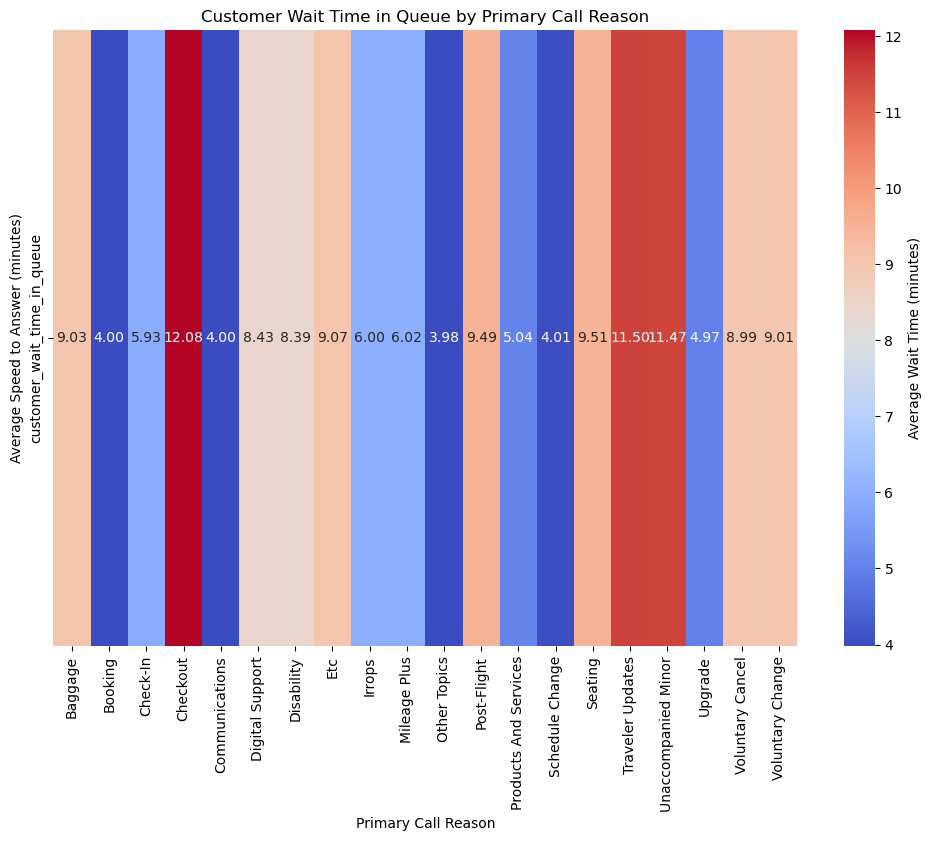

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame that you provided earlier

# Step 1: Convert primary_call_reason to a category (if not already)
df['primary_call_reason'] = df['primary_call_reason'].astype('category')

# Step 2: Group by primary_call_reason and calculate the mean customer_wait_time_in_queue
mean_wait_time = df.groupby('primary_call_reason')['customer_wait_time_in_queue'].mean().reset_index()

# Step 3: Plotting the heatmap using the grouped data
plt.figure(figsize=(12, 8))
sns.heatmap(mean_wait_time.set_index('primary_call_reason').T, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Wait Time (minutes)'})
plt.title('Customer Wait Time in Queue by Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Speed to Answer (minutes)')
plt.show()


In [127]:
df_call=pd.read_csv('oldcalls.csv')

In [128]:
df_call.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [126]:
df.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_in_queue,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,average_handle_time,hour
0,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,00:15:00,3.0,Tammy Walters,1,519057,calm,neutral,0.02,0.35,12.0,0
1,6834291559,Irrops,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,00:27:00,8.0,Jeffery Dixon,1,158319,neutral,polite,-0.13,0.32,19.0,23
2,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,00:12:00,5.0,David Wilkins,2,488324,neutral,frustrated,-0.20,0.20,7.0,0
3,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,00:19:00,10.0,Elizabeth Daniels,0,721730,neutral,polite,-0.05,0.35,9.0,0
4,5297766997,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,00:29:00,5.0,Emily Alexander,5,817160,calm,calm,0.10,0.11,24.0,0


In [2]:
import pandas as pd
dt=pd.read_excel('2merged.xlsx')

In [6]:
dt.head()
import re


In [7]:
pd.set_option('display.max_colwidth', None)  # or use a specific number for maximum width

In [8]:
def clean_transcript(transcript):
    # Remove newline characters and extra whitespace
    transcript = re.sub(r'\n+', ' ', transcript).strip()
    # Remove speaker identifiers
    transcript = re.sub(r'agent:\s*', '', transcript, flags=re.IGNORECASE)
    transcript = re.sub(r'customer:\s*', '', transcript, flags=re.IGNORECASE)
    # Normalize to lowercase
    transcript = transcript.lower()
    return transcript

# Apply the cleaning function to the 'call_transcript' column
dt['cleaned_transcript'] = dt['call_transcript'].apply(clean_transcript)

# Display the cleaned transcripts
print(dt[['cleaned_transcript']].head())

In [9]:
def remove_asterisk_text(text):
    return re.sub(r'\*.*?\*', '', text)

# Apply the function to the 'transcript' column
dt['call_transcript'] = dt['call_transcript'].apply(remove_asterisk_text)

# Print the cleaned DataFrame
print(dt)

In [10]:
dt.head()

,call_transcript,customer_tone,agent_tone,primary_call_reason,cleaned_transcript
0,"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help make this up to you. Hmm, it looks like I can get you booked on a flight leaving at 3pm tomorrow that will have you landing in New York by 5pm. I'll waive the change fee and provide you with a travel voucher for $200 to help cover expenses from the missed meetings today. Does that work for your schedule?\n\nCustomer: I guess that's better than nothing. But you really need to get your act together, this is unacceptable customer service from United. Your delays are costing people time and money. \n\nAgent: You're right, we want to do better for our customers. I apologize again for the delay and inconvenience. Thank you for flying with us and I hope the rescheduled flight and travel credit help make up for some of the trouble today. Please feel free to reach back out if you have any other issues. Thanks for your patience and for understanding - I appreciate you taking the time to work through this with me.\n\nCustomer: Alright fine. This better not happen again next time I fly United. \n\nAgent: I'll be sure to note your record so we can try and avoid any repeats going forward. Take care and have a good rest of your day.\n\nCustomer: Yeah, you too. \n\nAgent: Thank you for your call, next caller please. Hi there, thank you for calling United how can I help?",angry,neutral,Voluntary Cancel,"thank you for calling united airlines customer service, my name is sarah how may i help you? hi, yeah i'm calling because my flight from chicago to new york was delayed by over 3 hours! this is ridiculous, i'm missing important meetings because of this. i'm so sorry to hear about the delay, that's definitely frustrating. umm, let me pull up your reservation and take a look at what happened. *typing sounds* okay, it looks like there was severe weather in chicago that caused multiple flight cancellations and delays across the board for all the airlines. ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm. ugh this is such poor planning on united's part, you should have rerouted passengers or put us on other flights that weren't delayed. now i've wasted a whole day. i understand your frustration sir, delays are never fun. let me see what options i have available to help make this up to you. hmm, it looks like i can get you booked on a flight leaving at 3pm tomorrow that will have you landing in new york by 5pm. i'll waive the change fee and provide you with a travel voucher for $200 to help cover expenses from the missed meetings today. does that work for your schedule? i guess that's better than nothing. but you really need to get your act together, this is unacceptable customer service from united. your delays are costing people time and money. you're right, we want to do better for our customers. i apologize again for the delay and inconvenience. thank you for flying with us and i hope the rescheduled flight and travel credit help make u

In [11]:
import pandas as pd

# Assuming you already have your DataFrame as 'df'

# Convert specific columns to lowercase
dt['customer_tone'] = dt['customer_tone'].str.lower()
dt['agent_tone'] = dt['agent_tone'].str.lower()
dt['primary_call_reason'] = dt['primary_call_reason'].str.lower()

# To verify the change, you can print the first few rows
print(dt[['customer_tone', 'agent_tone', 'primary_call_reason']].head())


  customer_tone agent_tone primary_call_reason
0         angry    neutral   voluntary  cancel
1       neutral       calm             booking
2        polite    neutral              irrops
3    frustrated    neutral             upgrade
4        polite    neutral             seating


In [17]:
!pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 667.8 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/626.3 kB 667.8 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/626.3 kB 512.0 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 602.4 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 919.0 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 942.1 kB/s eta 0:00:01
   ---------------------- ----------------- 348.2/626.3 kB 1.0 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/626.3 kB 1.1 MB/s eta 0:00:01
 

In [18]:
!pip install vaderSentiment


  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------------------- -------------------- 61.4/126.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [19]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [22]:
# Assuming your dataframe is named dt and has a 'cleaned_transcript' column
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataframe (dt)
# dt = pd.read_csv('your_data.csv')  # if reading from CSV

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns polarity score between -1 and 1

# Function to calculate sentiment using VADER
def get_vader_sentiment(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']  # Compound score between -1 and 1

# Apply the functions to 'cleaned_transcript' column and add results to new columns
dt['textblob_sentiment'] = dt['cleaned_transcript'].apply(get_textblob_sentiment)
dt['vader_sentiment'] = dt['cleaned_transcript'].apply(get_vader_sentiment)

# Show the updated dataframe with sentiment scores
print(dt[['cleaned_transcript', 'textblob_sentiment', 'vader_sentiment']])

# Now you can compare sentiment scores with customer_tone and agent_tone
# Example of checking correlation
correlation_textblob_customer = dt['textblob_sentiment'].corr(dt['customer_tone'])
correlation_vader_customer = dt['vader_sentiment'].corr(dt['customer_tone'])

print(f"Correlation between TextBlob sentiment and customer tone: {correlation_textblob_customer}")
print(f"Correlation between VADER sentiment and customer tone: {correlation_vader_customer}")


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [23]:
# Find unique values for customer_tone
unique_customer_tones = dt['customer_tone'].unique()
print("Unique customer tones:", unique_customer_tones)

# Find unique values for agent_tone
unique_agent_tones = dt['agent_tone'].unique()
print("Unique agent tones:", unique_agent_tones)


Unique customer tones: ['angry' 'neutral' 'polite' 'frustrated' 'calm']
Unique agent tones: ['neutral' 'calm' 'frustrated' 'angry' nan 'polite']


[nltk_data] Downloading package punkt to C:\Users\sushant
[nltk_data]     kaddu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\sushant
[nltk_data]     kaddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words:
flight: 585915
let: 288452
change: 230728
help: 186627
like: 180177
thank: 171501
would: 170512
united: 160752
calling: 148492
okay: 145644
get: 145136
typing: 143928
next: 131920
work: 124399
day: 123347
take: 121946
need: 117330
yeah: 114338
really: 111302
thanks: 111187


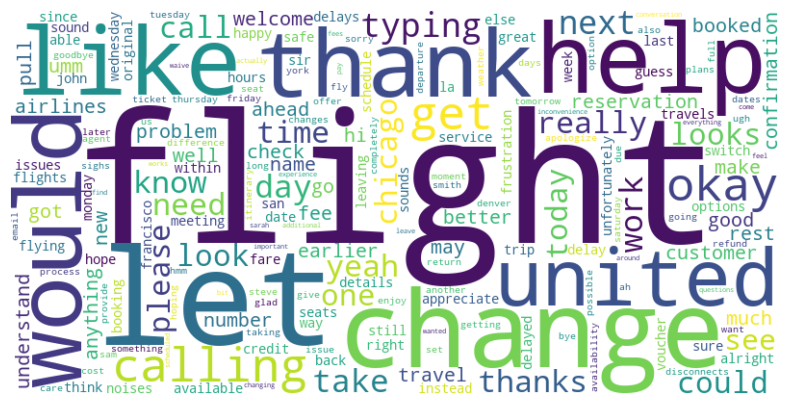

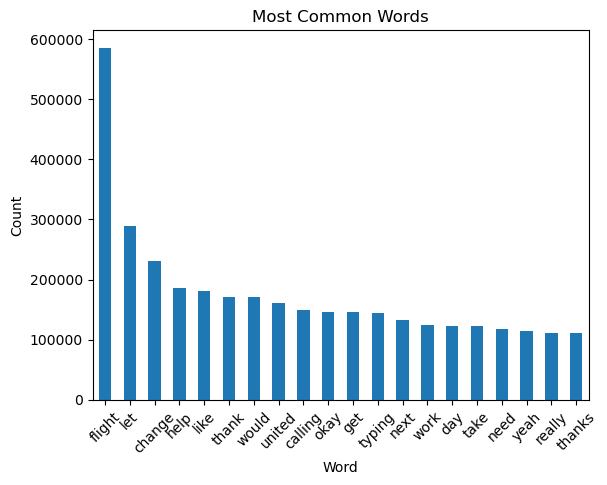

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Make sure to download the stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'cleaned_transcript' is your DataFrame column
transcript = ' '.join(dt['cleaned_transcript'].astype(str).tolist())

# Tokenization
tokens = word_tokenize(transcript.lower())

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count the frequency of words
word_counts = Counter(filtered_tokens)

# Get the most common words
common_words = word_counts.most_common(20)

# Print the most common words
print("Most common words:")
for word, count in common_words:
    print(f"{word}: {count}")

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualize the most common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
common_words_df.plot(x='Word', y='Count', kind='bar', legend=False, title='Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


In [34]:
import pandas as pd
import re
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Example cleaned transcript as a list of strings
# transcript = ["Hello, I would like to change my flight.", "I need help with my booking.", ...]

# Join the list into a single string
if isinstance(transcript, list):
    transcript = ' '.join(transcript)

# Define a function to extract sentences containing a specific word
def extract_context(transcript, word, num_sentences=3):
    # Split the transcript into sentences
    sentences = re.split(r'[.!?]', transcript)
    context_sentences = []
    
    for index, sentence in enumerate(sentences):
        if word in sentence.lower():
            # Capture a range of sentences around the found sentence
            start_index = max(index - num_sentences, 0)
            end_index = min(index + num_sentences + 1, len(sentences))
            context_sentences.extend(sentences[start_index:end_index])
    
    # Remove any duplicates and strip whitespace
    context_sentences = list(set(sentence.strip() for sentence in context_sentences))
    return context_sentences

# Broaden the word list with specific phrases
common_words = [
    'flight', 'change', 'help', 'let', 'like', 'thank', 'would', 
    'united', 'calling', 'okay', 'get', 'typing', 'next', 
    'work', 'day', 'take', 'need', 'yeah', 'really', 'thanks',
    'change my flight', 'help with booking', 'reschedule', 
    'delay', 'customer service', 'travel voucher', 'flight cancellation'
]

# Extract context for each common word
context_results = {word: extract_context(transcript, word) for word in common_words}

# Print the context for each common word
for word, contexts in context_results.items():
    print(f"Context for '{word}':")
    for context in contexts[:10]:
        print(f"- {context}")
    print()


Context for 'flight':
- 
- please let me know if you have any other issues, and thank you for your patience today - i know it hasn't been the travel experience you wanted
- yeah okay, switch me to the 4pm i guess
- hi, yeah umm i'm calling because i have a problem with my flight
- however, we may be able to work with you on applying the value of your ticket toward future travel
- i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd
- let me take a look at availability for later dates
- and i'll get you booked on an earlier flight in case that one is delayed, just as a backup
- as for a hotel and meals, due to the weather being the cause of the delay i unfortunately can't provide any vouchers for those
- as for the car rental, let me call around to the rental agencies near lax and see if any of them can have a car ready for you sooner when you land, just to give you some extra time

Context for 'change':
- 
- the fare for tomorro

In [54]:
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from collections import Counter

# Make sure to download the stopwords
nltk.download('stopwords')

# Define your contexts
contexts = [
    "please let me know if you have any other issues, and thank you for your patience today - i know it hasn't been the travel experience you wanted," "yeah okay, switch me to the 4pm i guess," "hi, yeah umm i'm calling because i have a problem with my flight," "however, we may be able to work with you on applying the value of your ticket toward future travel," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "let me take a look at availability for later dates," "and i'll get you booked on an earlier flight in case that one is delayed, just as a backup," "as for a hotel and meals, due to the weather being the cause of the delay i unfortunately can't provide any vouchers for those," "as for the car rental, let me call around to the rental agencies near lax and see if any of them can have a car ready for you sooner when you land, just to give you some extra time."

,"the fare for tomorrow is about $50 higher than what you already paid," "please let me know if you have any other issues, and thank you for your patience today - i know it hasn't been the travel experience you wanted," "however, we may be able to work with you on applying the value of your ticket toward future travel," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "thanks for understanding - i hope you start feeling better soon," "let me take a look at availability for later dates," "i just can't believe you all changed my flight without even notifying me," "umm, ideally around 10 or 11am if there's a flight," "this is really last minute for me and it's out of my control that i need to change it."

,"i completely understand the stress of flight delays and risk of missing connections," "ugh i don't know, that's still not very helpful considering i had plans when i was supposed to land," "unfortunately weather is out of our control but i can assure you our crew is working very hard to minimize disruptions," "hi, yeah umm i'm calling because i have a problem with my flight," "thanks for understanding - i hope you start feeling better soon," "notices short call time that one went smoothly," "no, i think that addresses my question about the delay," "as for the car rental, let me call around to the rental agencies near lax and see if any of them can have a car ready for you sooner when you land, just to give you some extra time," "sorry for being frustrated before."

,"please let me know if you have any other issues, and thank you for your patience today - i know it hasn't been the travel experience you wanted," "yeah okay, switch me to the 4pm i guess," "however, we may be able to work with you on applying the value of your ticket toward future travel," "hi, yeah umm i'm calling because i have a problem with my flight," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "this is really last minute for me and it's out of my control that i need to change it," "let me take a look at availability for later dates," "as for a hotel and meals, due to the weather being the cause of the delay i unfortunately can't provide any vouchers for those," "as for the car rental, let me call around to the rental agencies near lax and see if any of them can have a car ready for you sooner when you land, just to give you some extra time."

,"ugh i don't know, that's still not very helpful considering i had plans when i was supposed to land," "however, we may be able to work with you on applying the value of your ticket toward future travel," "hi, yeah umm i'm calling because i have a problem with my flight," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "unfortunately it looks like all the flights from new york to la today are fully booked because of the weather issues," "let me take a look at availability for later dates," "i just can't believe you all changed my flight without even notifying me," "as for a hotel and meals, due to the weather being the cause of the delay i unfortunately can't provide any vouchers for those," "i guess i have no choice, tomorrow morning flight will have to work."

,"please let me know if you have any other issues, and thank you for your patience today - i know it hasn't been the travel experience you wanted," "hi, yeah umm i'm calling because i have a problem with my flight," "thanks for understanding - i hope you start feeling better soon," "umm, ideally around 10 or 11am if there's a flight," "notices short call time that one went smoothly," "no, i think that addresses my question about the delay," "yeah whatever, thanks i guess hangs up phone loudly sighs have a good one sir," "sorry for being frustrated before," "as an apology, i'm also adding a $100 credit to your account for any onboard purchases or upgrades."

,"i completely understand the stress of flight delays and risk of missing connections," "ugh i don't know, that's still not very helpful considering i had plans when i was supposed to land," "the fare for tomorrow is about $50 higher than what you already paid," "yeah okay, switch me to the 4pm i guess," "however, we may be able to work with you on applying the value of your ticket toward future travel," "hi, yeah umm i'm calling because i have a problem with my flight," "let me take a look at availability for later dates," "i just can't believe you all changed my flight without even notifying me," "i guess i have no choice, tomorrow morning flight will have to work."

,"hi, yeah umm i'm calling because i have a problem with my flight," "thanks for understanding - i hope you start feeling better soon," "this is really last minute for me and it's out of my control that i need to change it," "notices short call time that one went smoothly," "sorry for being frustrated before," "it's going to take a lot for me to ever consider flying united again after this experience," "as an apology, i'm also adding a $100 credit to your account for any onboard purchases or upgrades," "wonderful, thank you so much david," "with the travel credit, i'll go ahead and cancel your outbound flight."

,"let me know if any other issues come up before your return flight," "hi, yeah umm i'm calling because i have a problem with my flight," "typing noises alright, i've got the flight here," "enjoy the rest of your week and safe travels on saturday," "notices short call time that one went smoothly," "umm yeah, it's px456912," "thanks again for everything, have a good rest of your day," "and please reach back out if there's anything else i can assist with," "wonderful, thank you so much david."

,"the fare for tomorrow is about $50 higher than what you already paid," "yeah okay, switch me to the 4pm i guess," "however, we may be able to work with you on applying the value of your ticket toward future travel," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "umm, ideally around 10 or 11am if there's a flight," "let me take a look at availability for later dates," "i just can't believe you all changed my flight without even notifying me," "as for the car rental, let me call around to the rental agencies near lax and see if any of them can have a car ready for you sooner when you land, just to give you some extra time," "sorry for being frustrated before."

,"ugh i don't know, that's still not very helpful considering i had plans when i was supposed to land," "the fare for tomorrow is about $50 higher than what you already paid," "yeah okay, switch me to the 4pm i guess," "i'm flying from chicago to los angeles on july 15th but i need to change it to the following week on july 22nd," "unfortunately it looks like all the flights from new york to la today are fully booked because of the weather issues," "i just can't believe you all changed my flight without even notifying me," "and i'll get you booked on an earlier flight in case that one is delayed, just as a backup," "as for a hotel and meals, due to the weather being the cause of the delay i unfortunately can't provide any vouchers for those," "do you think there's any way to get the fee waived or reduced at all."
]

# Combine all contexts into one string
text = ' '.join(contexts)

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Create bigrams and trigrams
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))

# Count the occurrences of each bigram and trigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Print the results
print("Bigrams:")
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count}")

print("\nTrigrams:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")
    

ten_grams = ngrams(filtered_tokens, 10)
ten_gram_counts = Counter(ten_grams)
print("\nMost Common 10-grams:")
print(ten_gram_counts.most_common(10))


Bigrams:
('please', 'let'): 4
('let', 'know'): 5
('know', 'issues'): 5
('issues', 'thank'): 4
('thank', 'patience'): 4
('patience', 'today'): 4
('today', 'know'): 4
('know', 'travel'): 4
('travel', 'experience'): 4
('experience', 'wanted'): 4
('wanted', 'yeah'): 2
('yeah', 'okay'): 5
('okay', 'switch'): 5
('switch', 'guess'): 5
('guess', 'hi'): 1
('hi', 'yeah'): 8
('yeah', 'umm'): 8
('umm', 'calling'): 8
('calling', 'problem'): 8
('problem', 'flight'): 8
('flight', 'however'): 1
('however', 'may'): 6
('may', 'able'): 6
('able', 'work'): 6
('work', 'applying'): 6
('applying', 'value'): 6
('value', 'ticket'): 6
('ticket', 'toward'): 6
('toward', 'future'): 6
('future', 'travel'): 6
('travel', 'flying'): 3
('flying', 'chicago'): 6
('chicago', 'los'): 6
('los', 'angeles'): 6
('angeles', 'july'): 6
('july', 'need'): 6
('need', 'change'): 9
('change', 'following'): 6
('following', 'week'): 6
('week', 'july'): 6
('july', 'let'): 1
('let', 'take'): 6
('take', 'look'): 6
('look', 'availability'

[nltk_data] Downloading package stopwords to C:\Users\sushant
[nltk_data]     kaddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
md=pd.read_csv('united_merged.csv')

In [57]:
md.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,total_customer_duration,customer_wait_time_in_queue,customer_name,elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,average_handle_time
0,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,00:15:00,00:03:00,Tammy Walters,1,519057,calm,neutral,0.02,0.35,00:12:00
1,6834291559,Irrops,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,00:27:00,00:08:00,Jeffery Dixon,1,158319,neutral,polite,-0.13,0.32,00:19:00
2,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,00:12:00,00:05:00,David Wilkins,2,488324,neutral,frustrated,-0.20,0.20,00:07:00
3,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,00:19:00,00:10:00,Elizabeth Daniels,0,721730,neutral,polite,-0.05,0.35,00:09:00
4,5297766997,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,00:29:00,00:05:00,Emily Alexander,5,817160,calm,calm,0.10,0.11,00:24:00


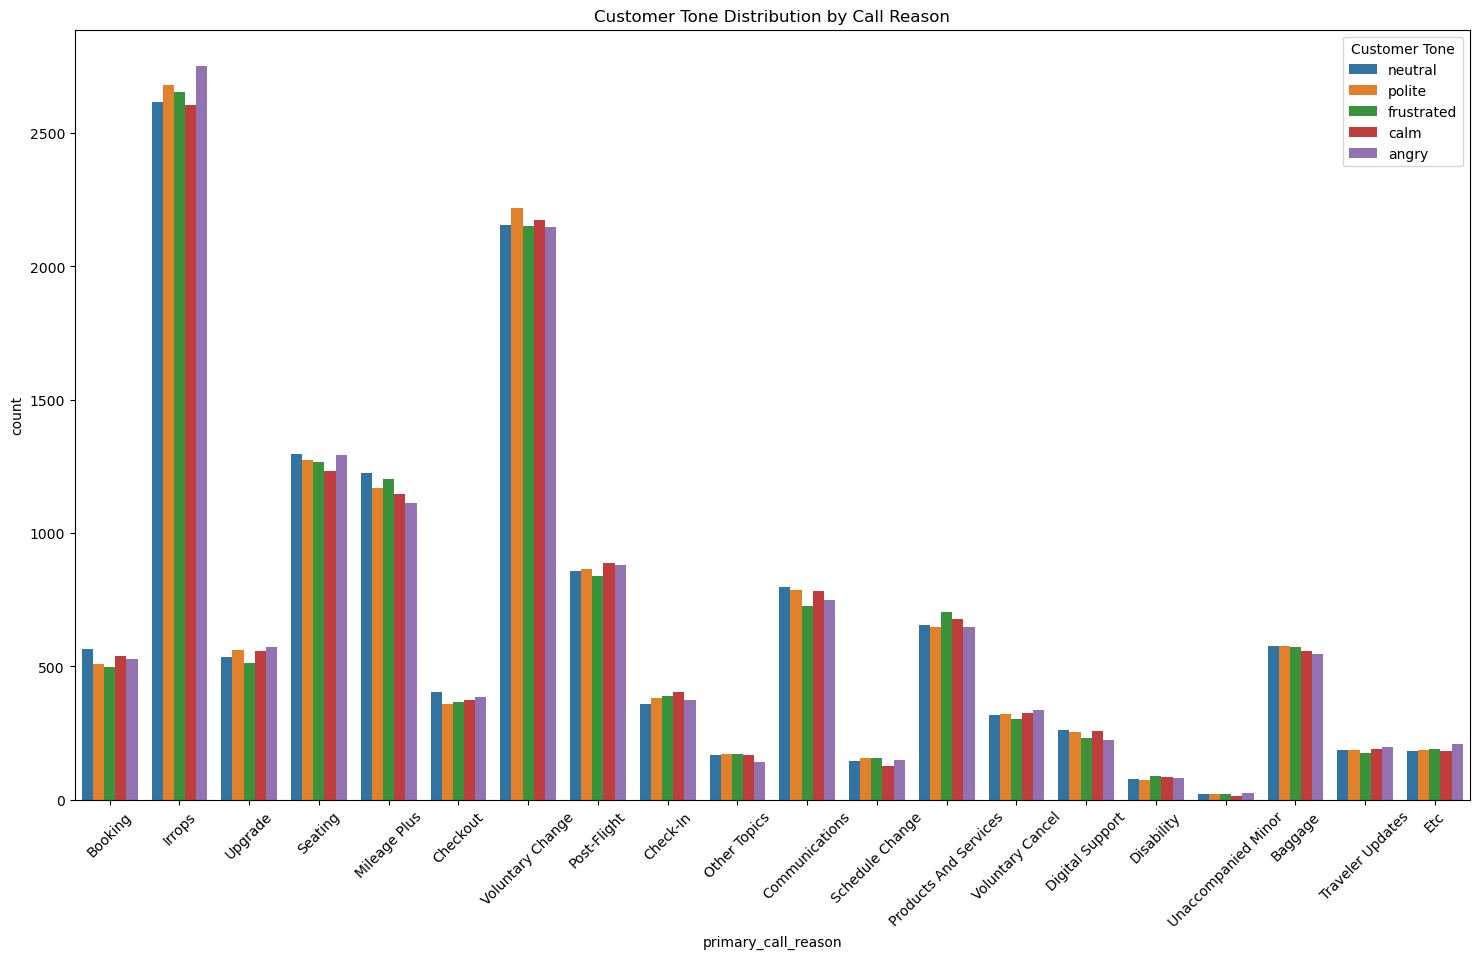

In [63]:
plt.figure(figsize=(18, 10))
sns.countplot(data=md, x='primary_call_reason', hue='customer_tone')
plt.title('Customer Tone Distribution by Call Reason')
plt.xticks(rotation=45)
plt.legend(title='Customer Tone')
plt.show()


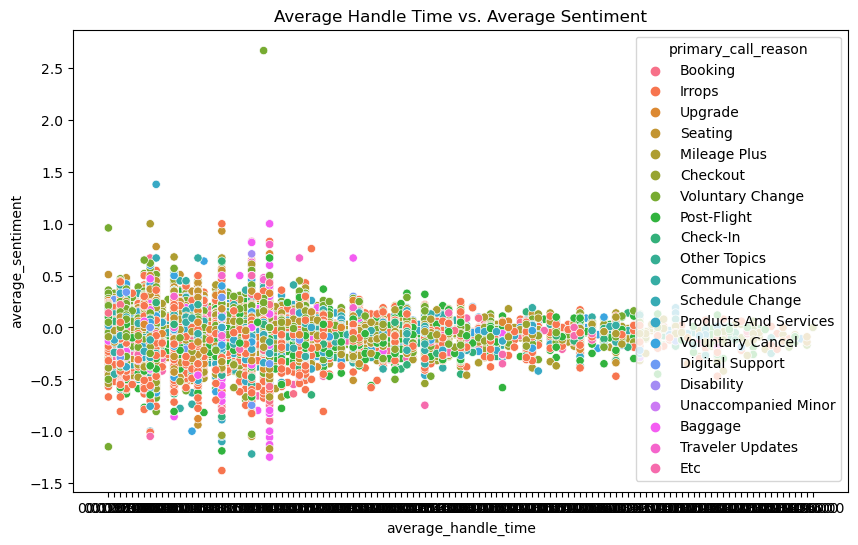

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=md, x='average_handle_time', y='average_sentiment', hue='primary_call_reason')
plt.title('Average Handle Time vs. Average Sentiment')
plt.show()


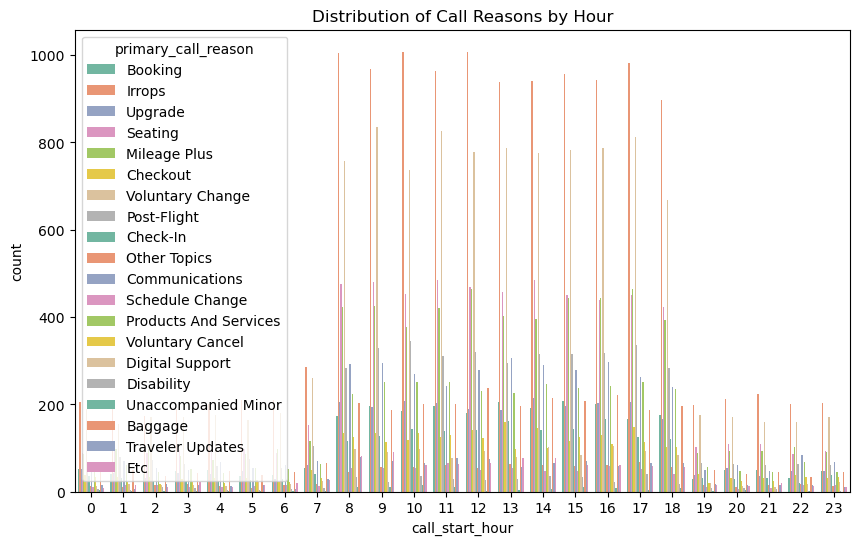

In [72]:
# Convert call start datetime to pandas datetime
md['call_start_datetime'] = pd.to_datetime(md['call_start_datetime'])

# Extract hour from call start time for time-based analysis
md['call_start_hour'] = md['call_start_datetime'].dt.hour

# Plot the distribution of call reasons by hour
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='call_start_hour', hue='primary_call_reason', palette='Set2')
plt.title('Distribution of Call Reasons by Hour')
plt.show()


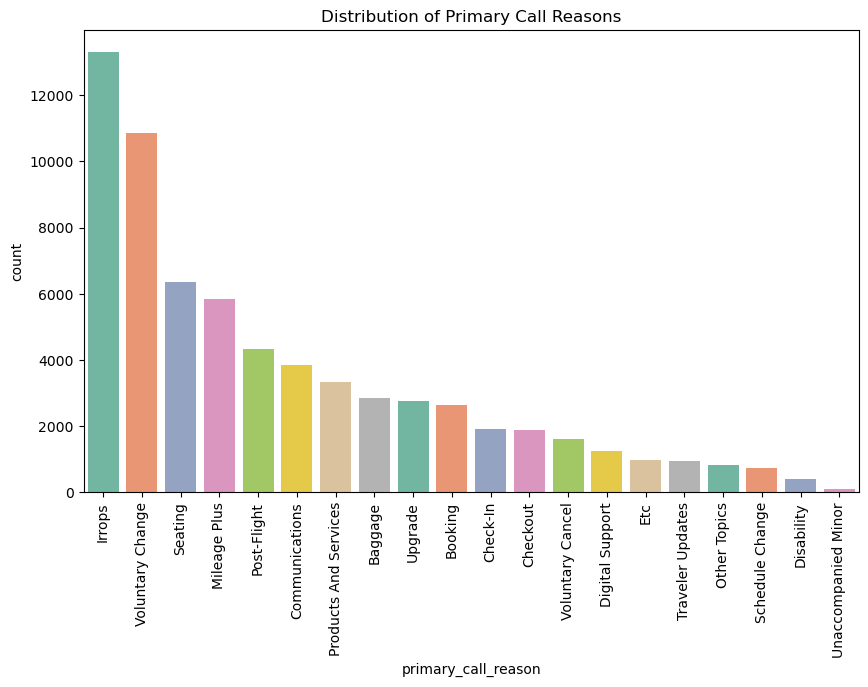

Irrops                   19.970894
Voluntary Change         16.275581
Seating                   9.549601
Mileage Plus              8.778431
Post-Flight               6.496429
Communications            5.761267
Products And Services     4.999100
Baggage                   4.248935
Upgrade                   4.107904
Booking                   3.956370
Check-In                  2.856628
Checkout                  2.832623
Voluntary Cancel          2.409530
Digital Support           1.837904
Etc                       1.428314
Traveler Updates          1.405809
Other Topics              1.227270
Schedule Change           1.096741
Disability                0.604633
Unaccompanied Minor       0.156034
Name: primary_call_reason, dtype: float64


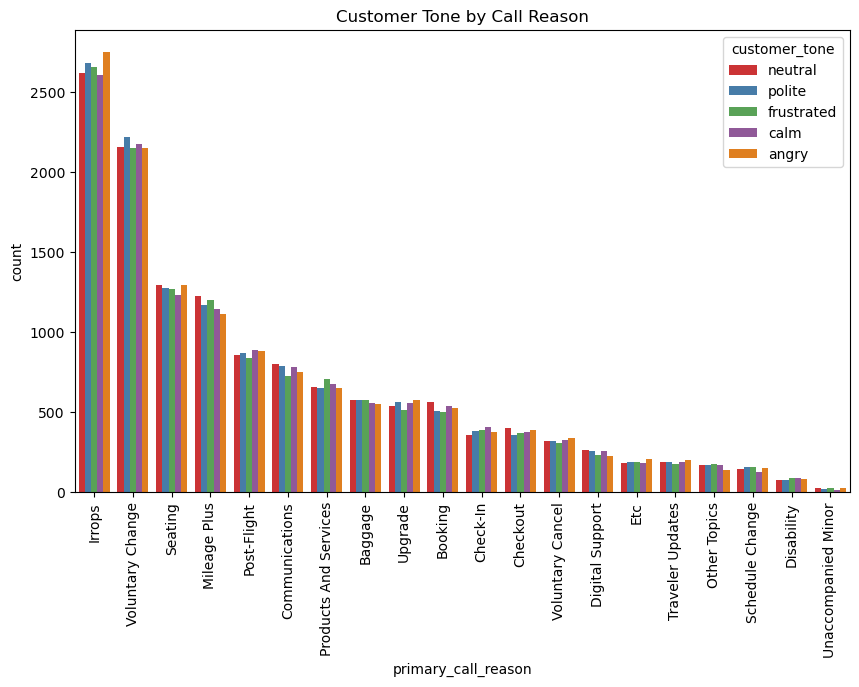

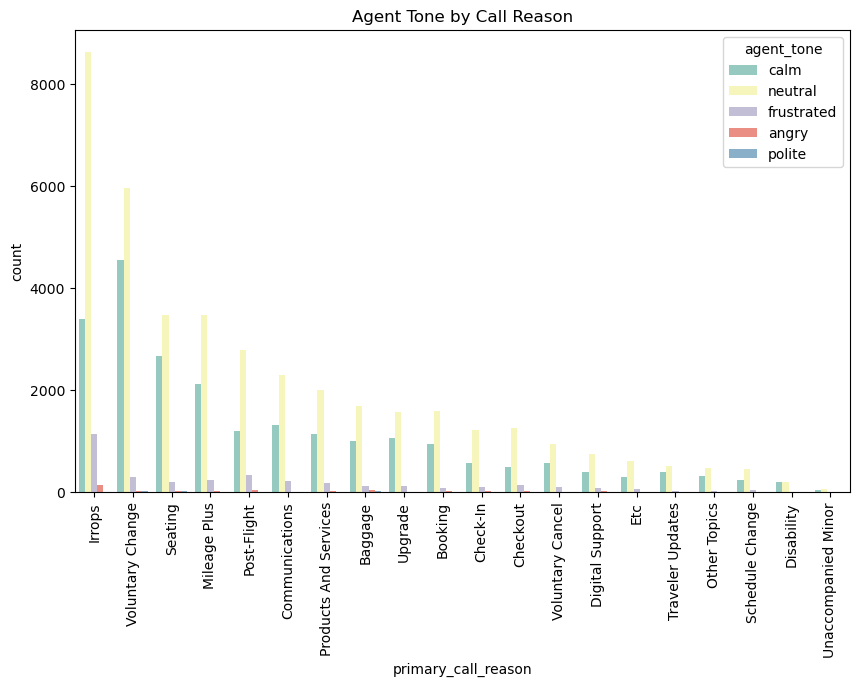

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

In [73]:
# Plot the distribution of 'primary_call_reason'
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='primary_call_reason', order=md['primary_call_reason'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Primary Call Reasons')
plt.show()

# Check if certain reasons are overrepresented
call_reason_counts = md['primary_call_reason'].value_counts(normalize=True) * 100
print(call_reason_counts)

# Compare call reasons with customer tone
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='primary_call_reason', hue='customer_tone', order=md['primary_call_reason'].value_counts().index, palette='Set1')
plt.xticks(rotation=90)
plt.title('Customer Tone by Call Reason')
plt.show()

# Compare call reasons with agent tone
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='primary_call_reason', hue='agent_tone', order=md['primary_call_reason'].value_counts().index, palette='Set3')
plt.xticks(rotation=90)
plt.title('Agent Tone by Call Reason')
plt.show()

# Compare call reasons with average customer wait time
md['customer_wait_time_in_queue'] = pd.to_timedelta(md['customer_wait_time_in_queue'])
plt.figure(figsize=(10,6))
sns.boxplot(data=md, x='primary_call_reason', y='customer_wait_time_in_queue', order=md['primary_call_reason'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Customer Wait Time by Call Reason')
plt.show()


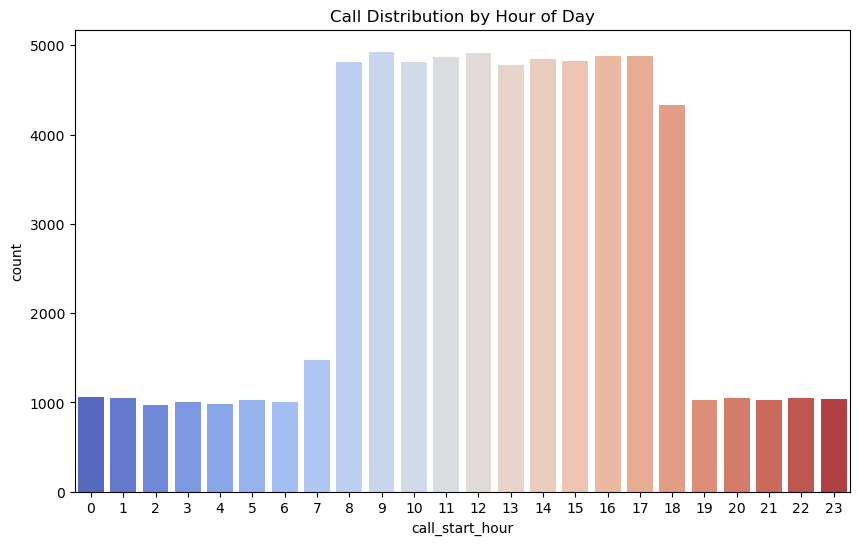

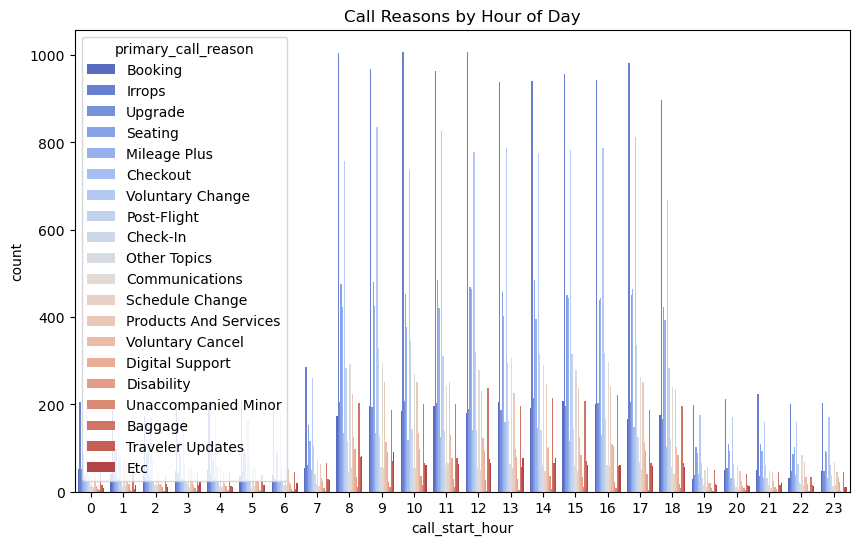

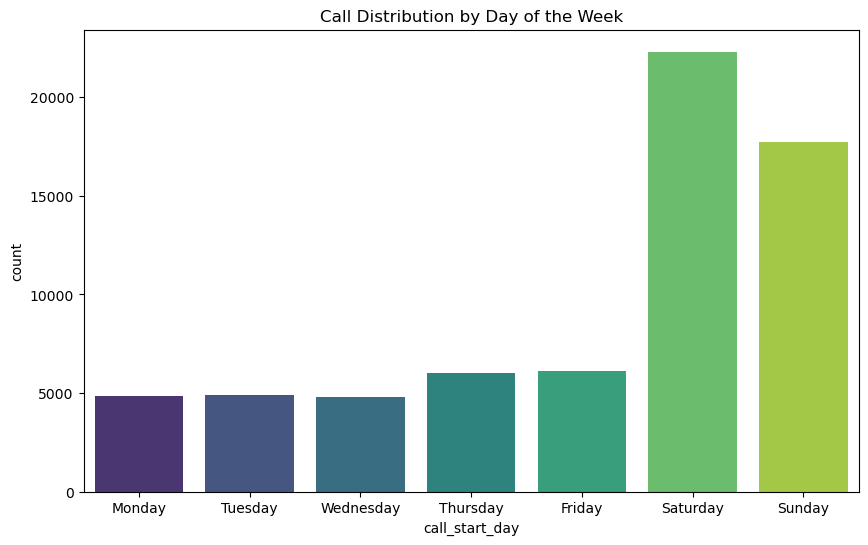

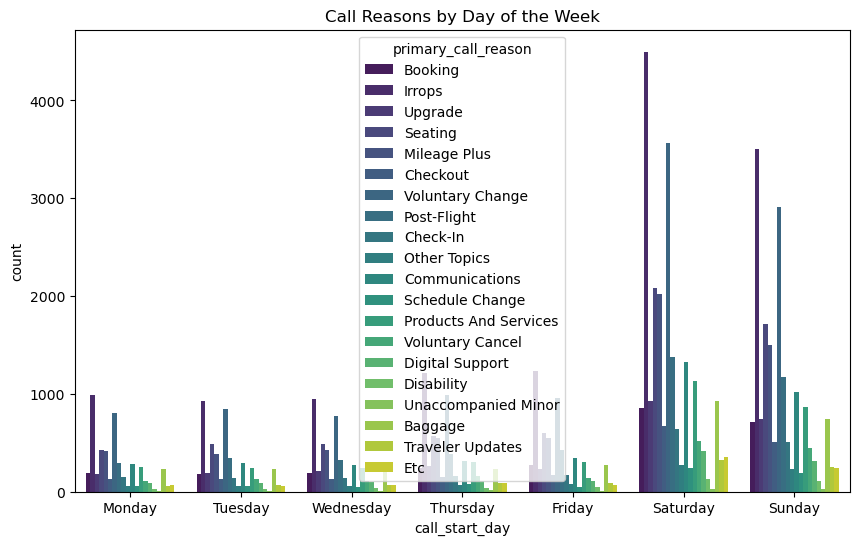

In [74]:
# Convert call_start_datetime to pandas datetime
md['call_start_datetime'] = pd.to_datetime(md['call_start_datetime'])

# Extract hour and day of the week from call start datetime
md['call_start_hour'] = md['call_start_datetime'].dt.hour
md['call_start_day'] = md['call_start_datetime'].dt.day_name()

# Plot distribution of calls by hour
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='call_start_hour', palette='coolwarm')
plt.title('Call Distribution by Hour of Day')
plt.show()

# Plot distribution of call reasons by hour of the day
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='call_start_hour', hue='primary_call_reason', palette='coolwarm')
plt.title('Call Reasons by Hour of Day')
plt.show()

# Plot distribution of calls by day of the week
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='call_start_day', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Call Distribution by Day of the Week')
plt.show()

# Plot distribution of call reasons by day of the week
plt.figure(figsize=(10,6))
sns.countplot(data=md, x='call_start_day', hue='primary_call_reason', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Call Reasons by Day of the Week')
plt.show()


   total_customer_duration_minutes  customer_wait_time_minutes  \
0                             15.0                         3.0   
1                             27.0                         8.0   
2                             12.0                         5.0   
3                             19.0                        10.0   
4                             29.0                         5.0   

   average_handle_time_minutes  
0                         12.0  
1                         19.0  
2                          7.0  
3                          9.0  
4                         24.0  


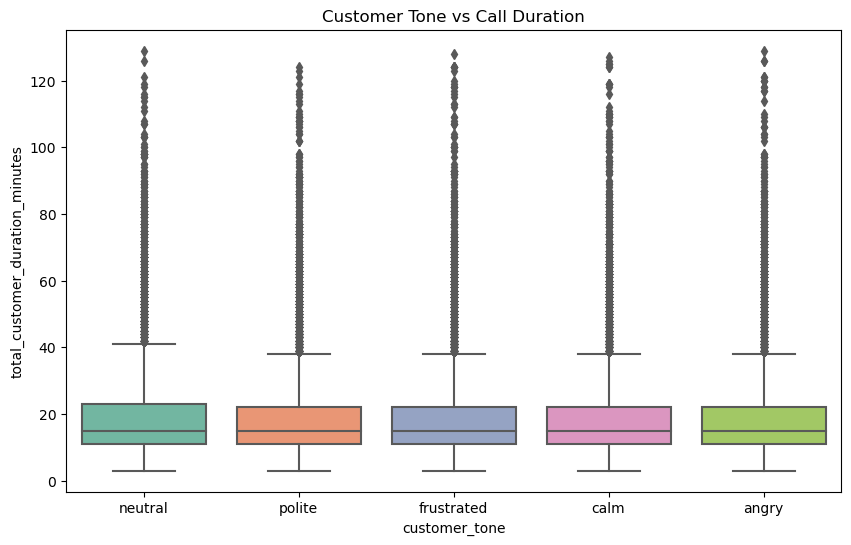

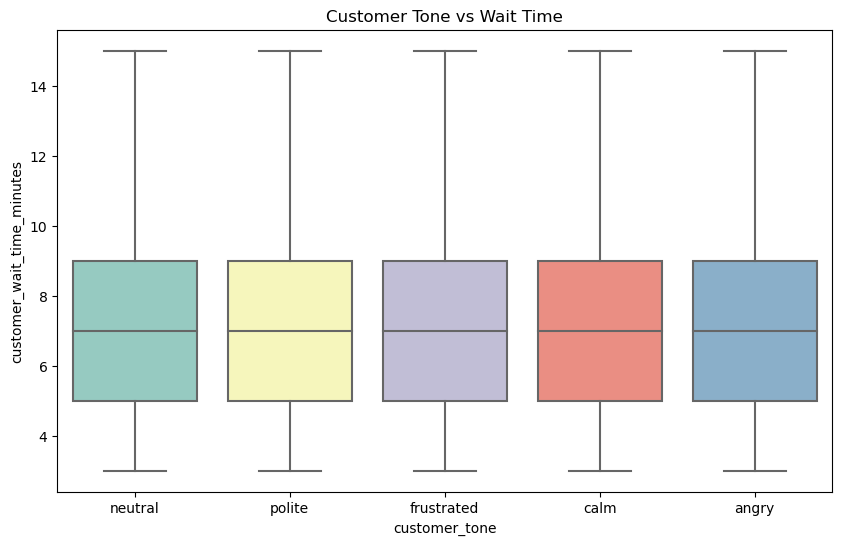

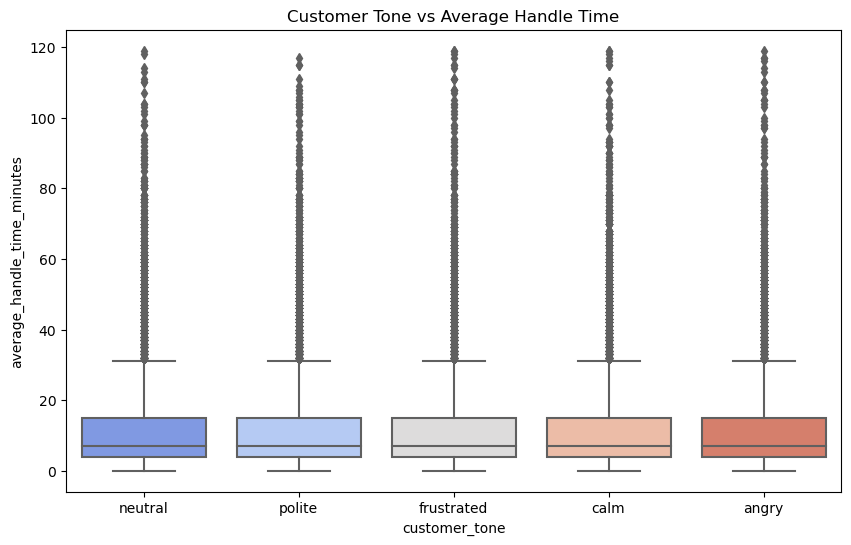

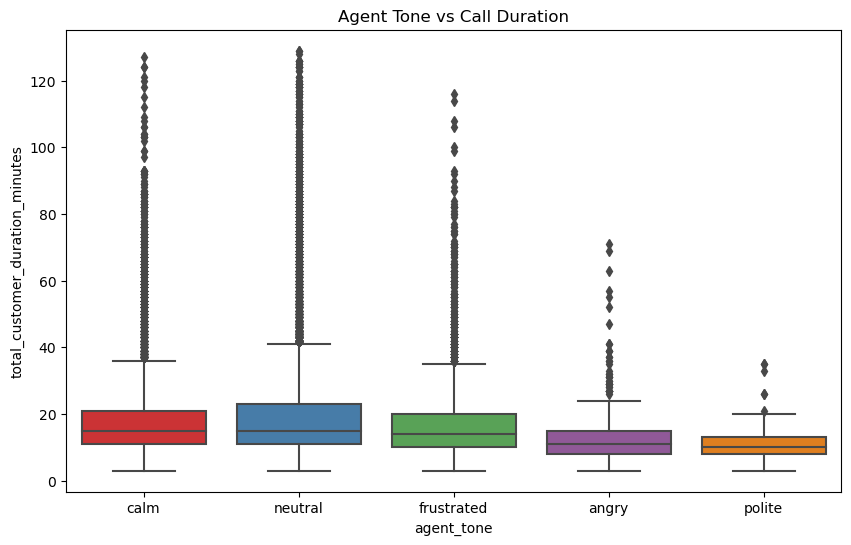

In [75]:
# Convert relevant time columns to numerical values (in minutes) for easier analysis
md['total_customer_duration_minutes'] = pd.to_timedelta(md['total_customer_duration']).dt.total_seconds() / 60
md['customer_wait_time_minutes'] = pd.to_timedelta(md['customer_wait_time_in_queue']).dt.total_seconds() / 60
md['average_handle_time_minutes'] = pd.to_timedelta(md['average_handle_time']).dt.total_seconds() / 60

# Check the first few rows to verify the new columns
print(md[['total_customer_duration_minutes', 'customer_wait_time_minutes', 'average_handle_time_minutes']].head())

# Examine customer sentiment vs other features
plt.figure(figsize=(10,6))
sns.boxplot(data=md, x='customer_tone', y='total_customer_duration_minutes', palette='Set2')
plt.title('Customer Tone vs Call Duration')
plt.show()

# Customer sentiment vs waiting time
plt.figure(figsize=(10,6))
sns.boxplot(data=md, x='customer_tone', y='customer_wait_time_minutes', palette='Set3')
plt.title('Customer Tone vs Wait Time')
plt.show()

# Customer sentiment vs average handle time
plt.figure(figsize=(10,6))
sns.boxplot(data=md, x='customer_tone', y='average_handle_time_minutes', palette='coolwarm')
plt.title('Customer Tone vs Average Handle Time')
plt.show()

# Check agent tone vs other features
plt.figure(figsize=(10,6))
sns.boxplot(data=md, x='agent_tone', y='total_customer_duration_minutes', palette='Set1')
plt.title('Agent Tone vs Call Duration')
plt.show()


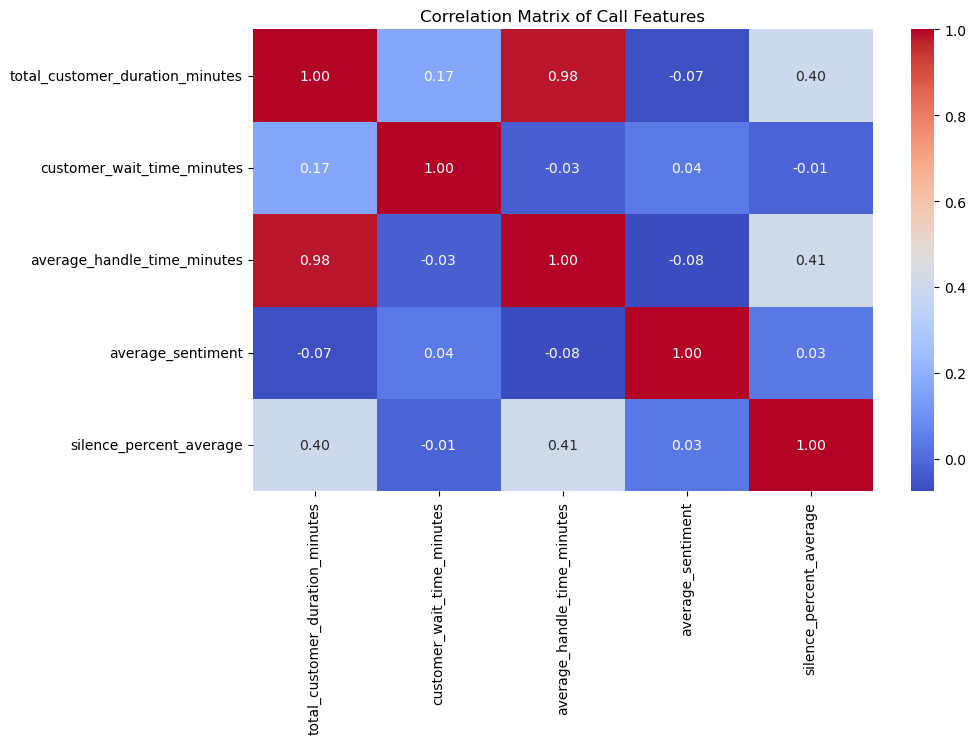

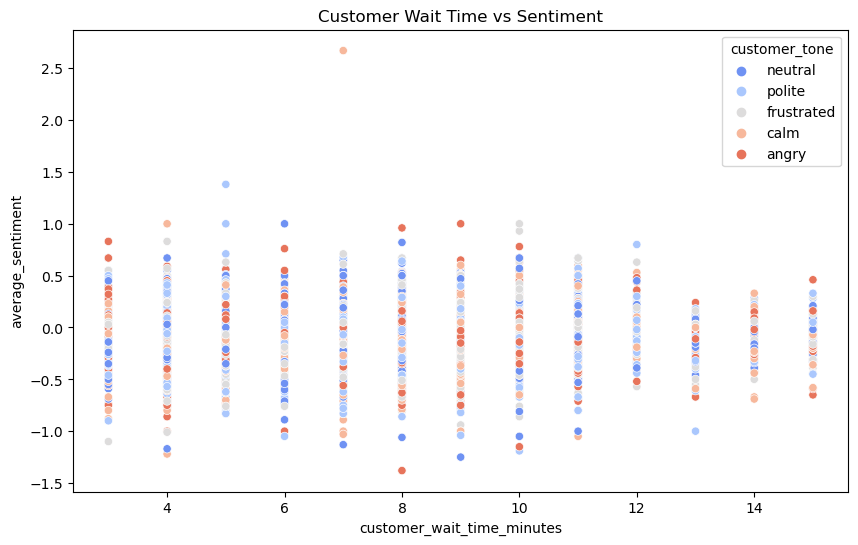

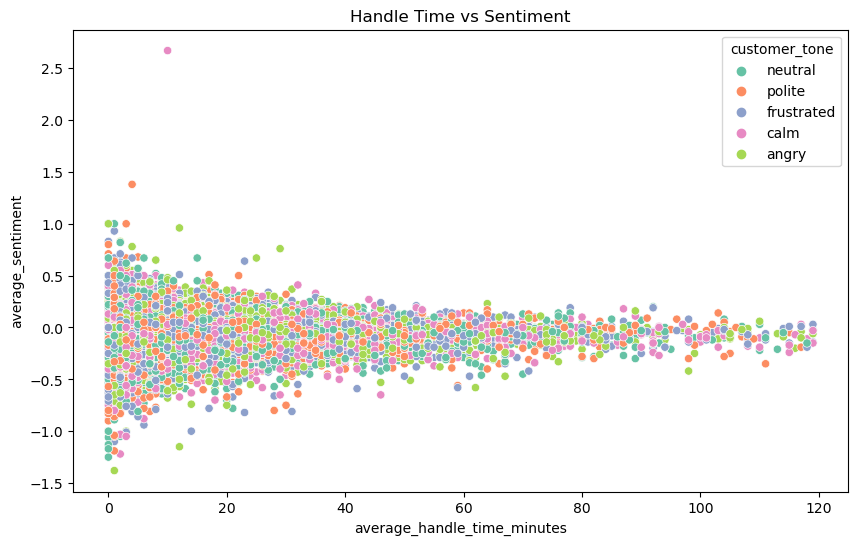

In [76]:
# Create a subset of relevant numerical columns
numeric_features = ['total_customer_duration_minutes', 'customer_wait_time_minutes', 'average_handle_time_minutes', 'average_sentiment', 'silence_percent_average']

# Calculate correlation matrix
correlation_matrix = md[numeric_features].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Call Features')
plt.show()

# Check correlation between wait time and customer sentiment
plt.figure(figsize=(10,6))
sns.scatterplot(data=md, x='customer_wait_time_minutes', y='average_sentiment', hue='customer_tone', palette='coolwarm')
plt.title('Customer Wait Time vs Sentiment')
plt.show()

# Check correlation between handle time and customer tone
plt.figure(figsize=(10,6))
sns.scatterplot(data=md, x='average_handle_time_minutes', y='average_sentiment', hue='customer_tone', palette='Set2')
plt.title('Handle Time vs Sentiment')
plt.show()


C:\Users\sushant kaddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sushant kaddu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sushant kaddu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


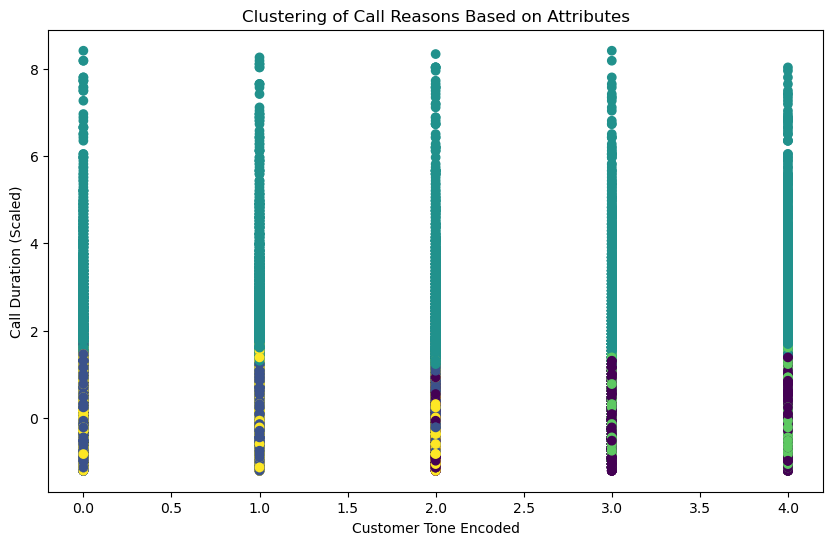

   cluster  \
0        0   
1        1   
2        2   
3        3   
4        4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preprocess categorical variables like 'primary_call_reason', 'customer_tone', 'agent_tone'
label_encoder_reason = LabelEncoder()
md['primary_call_reason_encoded'] = label_encoder_reason.fit_transform(md['primary_call_reason'])

label_encoder_cust_tone = LabelEncoder()
md['customer_tone_encoded'] = label_encoder_cust_tone.fit_transform(md['customer_tone'])

label_encoder_agent_tone = LabelEncoder()
md['agent_tone_encoded'] = label_encoder_agent_tone.fit_transform(md['agent_tone'])

# Scaling numerical features
scaler = StandardScaler()
md[['total_customer_duration_minutes', 'customer_wait_time_minutes', 'average_handle_time_minutes']] = scaler.fit_transform(
    md[['total_customer_duration_minutes', 'customer_wait_time_minutes', 'average_handle_time_minutes']])

# Select the features for clustering
clustering_features = ['customer_tone_encoded', 'agent_tone_encoded', 'total_customer_duration_minutes', 'customer_wait_time_minutes', 'average_handle_time_minutes']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters, adjust accordingly
md['cluster'] = kmeans.fit_predict(md[clustering_features])

# Visualize the cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(md['customer_tone_encoded'], md['total_customer_duration_minutes'], c=md['cluster'], cmap='viridis')
plt.title('Clustering of Call Reasons Based on Attributes')
plt.xlabel('Customer Tone Encoded')
plt.ylabel('Call Duration (Scaled)')
plt.show()

# Check cluster assignments
print(md[['primary_call_reason', 'cluster']].groupby('cluster').agg(list).reset_index())


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocess categorical variables
label_encoder_reason = LabelEncoder()
md['primary_call_reason_encoded'] = label_encoder_reason.fit_transform(md['primary_call_reason'])

label_encoder_cust_tone = LabelEncoder()
md['customer_tone_encoded'] = label_encoder_cust_tone.fit_transform(md['customer_tone'])

label_encoder_agent_tone = LabelEncoder()
md['agent_tone_encoded'] = label_encoder_agent_tone.fit_transform(md['agent_tone'])

# Convert time columns to numerical features
md['total_customer_duration_minutes'] = md['total_customer_duration'].apply(lambda x: pd.to_timedelta(x).total_seconds() / 60)
md['customer_wait_time_minutes'] = md['customer_wait_time_in_queue'].apply(lambda x: pd.to_timedelta(x).total_seconds() / 60)
md['average_handle_time_minutes'] = md['average_handle_time'].apply(lambda x: pd.to_timedelta(x).total_seconds() / 60)

# Feature selection
X = md[['customer_tone_encoded', 'agent_tone_encoded', 
         'total_customer_duration_minutes', 'customer_wait_time_minutes', 
         'average_handle_time_minutes']]
y = md['primary_call_reason_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Decode the predicted call reasons
y_pred_labels = label_encoder_reason.inverse_transform(y_pred)

# Check sample predictions with actual values
print(pd.DataFrame({'Actual': label_encoder_reason.inverse_transform(y_test), 'Predicted': y_pred_labels}).head())


NameError: name 'md' is not defined